In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
from numpy.linalg import norm

In [15]:
# load nba datasets
advanced_df = pd.read_csv("../data/nbadataset/Advanced.csv")
per_game_df = pd.read_csv("../data/nbadataset/Player Per Game.csv")

for year in range(2020, 2025):
    # filter data for the specific year
    advanced_year_df = advanced_df[advanced_df['season'] == year]
    per_game_year_df = per_game_df[per_game_df['season'] == year]

    # save to csv files
    advanced_year_df.to_csv(f"../data/raw/{year}/Advanced_{year}.csv", index=False)
    per_game_year_df.to_csv(f"../data/raw/{year}/Player_Per_Game_{year}.csv", index=False)
    
    
advanced_2024_df = pd.read_csv(f"../data/raw/2024/Advanced_2024.csv")
advanced_2023_df = pd.read_csv(f"../data/raw/2023/Advanced_2023.csv")
advanced_2022_df = pd.read_csv(f"../data/raw/2022/Advanced_2022.csv")
advanced_2021_df = pd.read_csv(f"../data/raw/2021/Advanced_2021.csv")
advanced_2020_df = pd.read_csv(f"../data/raw/2020/Advanced_2020.csv")

per_game_2024_df = pd.read_csv(f"../data/raw/2024/Player_Per_Game_2024.csv")
per_game_2023_df = pd.read_csv(f"../data/raw/2023/Player_Per_Game_2023.csv")
per_game_2022_df = pd.read_csv(f"../data/raw/2022/Player_Per_Game_2022.csv")
per_game_2021_df = pd.read_csv(f"../data/raw/2021/Player_Per_Game_2021.csv")
per_game_2020_df = pd.read_csv(f"../data/raw/2020/Player_Per_Game_2020.csv")

In [16]:
# clean and merge data
for year in range(2020, 2025):
    advanced_year_df = pd.read_csv(f"../data/raw/{year}/Advanced_{year}.csv")
    per_game_year_df = pd.read_csv(f"../data/raw/{year}/Player_Per_Game_{year}.csv")
    
    # ensure consistent formatting
    advanced_year_df["player"] = advanced_year_df["player"].str.strip()
    per_game_year_df["player"] = per_game_year_df["player"].str.strip()
    
    # merge
    nba_year_df = pd.merge(advanced_year_df, per_game_year_df, on=["player", "team"], how="inner")
    nba_year_df.to_csv(f"../data/processed/{year}/NBA_{year}.csv", index=False)
    
    display(nba_year_df.head())

,season_x,lg_x,player,player_id_x,age_x,team,pos_x,g_x,gs_x,mp,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2020,NBA,Steven Adams,adamsst01,26.0,OKC,C,63,63.0,1680.0,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2020,NBA,Bam Adebayo,adebaba01,22.0,MIA,PF,72,72.0,2417.0,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,2020,NBA,LaMarcus Aldridge,aldrila01,34.0,SAS,C,53,53.0,1754.0,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,2020,NBA,Kyle Alexander,alexaky01,23.0,MIA,C,2,0.0,13.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,2020,NBA,Nickeil Alexander-Walker,alexani01,21.0,NOP,SG,47,1.0,591.0,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


,season_x,lg_x,player,player_id_x,age_x,team,pos_x,g_x,gs_x,mp,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2021,NBA,Precious Achiuwa,achiupr01,21.0,MIA,PF,61,4.0,737.0,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2021,NBA,Jaylen Adams,adamsja01,24.0,MIL,PG,7,0.0,18.0,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,2021,NBA,Steven Adams,adamsst01,27.0,NOP,C,58,58.0,1605.0,...,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,2021,NBA,Bam Adebayo,adebaba01,23.0,MIA,C,64,64.0,2143.0,...,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
4,2021,NBA,LaMarcus Aldridge,aldrila01,35.0,2TM,C,26,23.0,674.0,...,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


,season_x,lg_x,player,player_id_x,age_x,team,pos_x,g_x,gs_x,mp,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2022,NBA,Precious Achiuwa,achiupr01,22.0,TOR,C,73,28.0,1725.0,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2022,NBA,Steven Adams,adamsst01,28.0,MEM,C,76,75.0,1999.0,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,2022,NBA,Bam Adebayo,adebaba01,24.0,MIA,C,56,56.0,1825.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,2022,NBA,Santi Aldama,aldamsa01,21.0,MEM,PF,32,0.0,360.0,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,2022,NBA,LaMarcus Aldridge,aldrila01,36.0,BRK,C,47,12.0,1050.0,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


,season_x,lg_x,player,player_id_x,age_x,team,pos_x,g_x,gs_x,mp,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2023,NBA,Precious Achiuwa,achiupr01,23.0,TOR,C,55,12.0,1140.0,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2023,NBA,Steven Adams,adamsst01,29.0,MEM,C,42,42.0,1133.0,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,2023,NBA,Bam Adebayo,adebaba01,25.0,MIA,C,75,75.0,2598.0,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,2023,NBA,Ochai Agbaji,agbajoc01,22.0,UTA,SG,59,22.0,1209.0,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,2023,NBA,Santi Aldama,aldamsa01,22.0,MEM,PF,77,20.0,1682.0,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


,season_x,lg_x,player,player_id_x,age_x,team,pos_x,g_x,gs_x,mp,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2024,NBA,Precious Achiuwa,achiupr01,24.0,2TM,PF,74,18.0,1624.0,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,2024,NBA,Precious Achiuwa,achiupr01,24.0,TOR,C,25,0.0,437.0,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,2024,NBA,Precious Achiuwa,achiupr01,24.0,NYK,PF,49,18.0,1187.0,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2024,NBA,Bam Adebayo,adebaba01,26.0,MIA,C,71,71.0,2416.0,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,2024,NBA,Ochai Agbaji,agbajoc01,23.0,2TM,SG,78,28.0,1641.0,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [4]:
# === Feature mapping: (draft_feature, nba_feature) ===
similarity_features = [
    ("PTS", "pts_per_game"),
    ("AST", "ast_per_game"),
    ("TRB", "trb_per_game"),
    ("STL", "stl_per_game"),
    ("BLK", "blk_per_game"),
    ("TOV", "tov_per_game"),
    ("FG%", "fg_percent"),
    ("3P%", "x3p_percent"),
    ("FT%", "ft_percent"),
    ("USG%", "usg_percent"),
    ("TS%", "ts_percent"),
    ("eFG%", "e_fg_percent"),   # draft has eFG% or EFG% (we’ll handle both)
    ("AST%", "ast_percent"),
    ("TRB%", "trb_percent"),
    ("STL%", "stl_percent"),
    ("BLK%", "blk_percent"),
    ("TOV%", "tov_percent"),
    ("OBPM", "obpm"),
    ("DBPM", "dbpm"),
    ("BPM", "bpm"),
    ("WS/48", "ws_48"),
]

# canonical column names after alignment (for both sides)
canonical_cols = [f[0] for f in similarity_features]

In [5]:
# % normalisation + NA handling
def to_numeric(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors='coerce')
    return df

def normalize_percent_scale(series):
    """
    Make percentages comparable by ensuring 0..1 scale.
    If we detect values > 1.5, assume 0..100 and divide by 100.
    """
    s = series.astype(float)
    if s.max(skipna=True) is not None and s.max(skipna=True) > 1.5:
        return s / 100.0
    return s

def coerce_percent_cols(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = normalize_percent_scale(df[c])
    return df

def median_impute(df, cols):
    for c in cols:
        if c in df.columns:
            med = df[c].median(skipna=True)
            df[c] = df[c].fillna(med)
    return df

def ensure_efg_col(draft_df):
    # Some years your draft CSV has "eFG%" or "EFG%" — make one canonical "eFG%"
    if "eFG%" in draft_df.columns:
        return draft_df
    if "EFG%" in draft_df.columns:
        draft_df = draft_df.rename(columns={"EFG%": "eFG%"})
    return draft_df

In [6]:
def run_prospect_comps(year):
    # load + align year's data
    draft_path = f"../data/processed/{year}/draftpool_stats_{year}.csv"
    nba_path    = f"../data/processed/{year}/NBA_{year}.csv"

    draft_df = pd.read_csv(draft_path)
    nba_df   = pd.read_csv(nba_path)

    # Clean names
    draft_df["Name"] = draft_df["Name"].str.strip()
    nba_df["player"] = nba_df["player"].str.strip()

    # Make sure eFG% exists
    draft_df = ensure_efg_col(draft_df)

    # %%
    # build aligned feature frames
    # Draft side: subset to mapped draft columns (rename to canonical)
    draft_cols_present = []
    for draft_col, _ in similarity_features:
        if draft_col in draft_df.columns:
            draft_cols_present.append(draft_col)
        elif draft_col == "eFG%" and "EFG%" in draft_df.columns:
            # handled in ensure_efg_col, so we added "eFG%" already
            draft_cols_present.append("eFG%")

    draft_feats = draft_df[["Name", "classification", "Age"] + draft_cols_present].copy()

    # NBA side: subset to mapped nba columns, rename to canonical (draft names)
    nba_rename_map = {nba: draft for draft, nba in similarity_features if nba in nba_df.columns}
    nba_needed = list(nba_rename_map.keys())
    nba_feats = nba_df[["player", "age_x"] + nba_needed].copy().rename(columns=nba_rename_map)
    nba_feats = nba_feats.rename(columns={"player": "NBA_Player", "age_x": "NBA_Age"})

    # Keep only canonical columns that are actually present on both sides
    cols_in_both = [c for c in canonical_cols if c in draft_feats.columns and c in nba_feats.columns]

    # %%
    # Make percentages consistent + impute + scale on NBA
    # Coerce numerics
    draft_feats = to_numeric(draft_feats, cols_in_both + ["Age"])
    nba_feats   = to_numeric(nba_feats,   cols_in_both + ["NBA_Age"])

    # Normalize % scale to 0..1 for these columns
    percent_like = ["FG%", "3P%", "FT%", "TS%", "eFG%", "AST%", "TRB%", "STL%", "BLK%", "TOV%", "USG%"]
    draft_feats = coerce_percent_cols(draft_feats, [c for c in percent_like if c in draft_feats.columns])
    nba_feats   = coerce_percent_cols(nba_feats,   [c for c in percent_like if c in nba_feats.columns])

    # Median impute
    draft_feats = median_impute(draft_feats, cols_in_both)
    nba_feats   = median_impute(nba_feats,   cols_in_both)

    # Scale: fit on NBA, transform both
    scaler = StandardScaler()
    nba_X    = scaler.fit_transform(nba_feats[cols_in_both].values)
    draft_X  = scaler.transform(draft_feats[cols_in_both].values)

    # %%
    # nearest neighbours for NBA comps
    knn = NearestNeighbors(n_neighbors=3, metric="euclidean")
    knn.fit(nba_X)

    distances, indices = knn.kneighbors(draft_X, n_neighbors=3, return_distance=True)

    # Build comps DataFrame
    comp_cols = ["Comp1", "Comp2", "Comp3"]
    dist_cols = ["Comp1_dist", "Comp2_dist", "Comp3_dist"]

    comps_df = pd.DataFrame({
        "Name": draft_feats["Name"],
        "Archetype": np.nan,  # placeholder; filled below
        "Comp1": nba_feats.iloc[indices[:,0]]["NBA_Player"].to_list(),
        "Comp2": nba_feats.iloc[indices[:,1]]["NBA_Player"].to_list(),
        "Comp3": nba_feats.iloc[indices[:,2]]["NBA_Player"].to_list(),
        "Comp1_dist": distances[:,0],
        "Comp2_dist": distances[:,1],
        "Comp3_dist": distances[:,2],
    })

    # %%
    # KMeans on NBA to define archetypes, predict prospects' archetypes 
    k = 8  # tweak if you want
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(nba_X)

    # NBA players cluster labels (optional if you want to inspect)
    nba_archetypes = kmeans.labels_

    # Prospect archetypes
    prospect_archetypes = kmeans.predict(draft_X)
    comps_df["Archetype"] = prospect_archetypes + 1  # 1-indexed clusters

    # %%
    # outputs 
    out_path = f"../data/processed/{year}/prospect_comps_{year}.csv"
    comps_df.to_csv(out_path, index=False)
    print("✅ Saved:", out_path)

    display(comps_df.head(10))

In [30]:
for year in range(2020,2025):
    run_prospect_comps(year)

✅ Saved: ../data/processed/2020/prospect_comps_2020.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_dist,Comp2_dist,Comp3_dist
0,Anthony Edwards,2,Paul George,Jayson Tatum,Zach LaVine,1.905463,2.088666,2.392892
1,James Wiseman,5,Hassan Whiteside,Mitchell Robinson,Anthony Davis,8.180179,8.395909,8.705380
2,Patrick Williams,5,Gorgui Dieng,Gorgui Dieng,Gorgui Dieng,2.666198,2.679281,2.940478
3,Isaac Okoro,8,James Johnson,Shai Gilgeous-Alexander,Nemanja Bjelica,2.813611,2.955659,3.016090
4,Onyeka Okongwu,5,Anthony Davis,Jonathan Isaac,Mitchell Robinson,4.202464,4.671265,5.343522
5,Obi Toppin,2,Karl-Anthony Towns,John Collins,Jayson Tatum,3.646847,4.211203,4.352145
6,Jalen Smith,5,Anthony Davis,Hassan Whiteside,Rudy Gobert,4.248973,4.393313,4.605651
7,Devin Vassell,5,Jae Crowder,OG Anunoby,Gorgui Dieng,3.912154,4.003382,4.145627
8,Tyrese Haliburton,2,Ben Simmons,Jimmy Butler,Chris Paul,4.041987,4.160987,4.272586
9,Kira Lewis Jr.,2,Jrue Holiday,Kyle Lowry,Jimmy Butler,2.089226,2.230433,2.515229


✅ Saved: ../data/processed/2021/prospect_comps_2021.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_dist,Comp2_dist,Comp3_dist
0,Cade Cunningham,7,Paul George,LaMelo Ball,Kelly Olynyk,3.574816,3.978793,4.020863
1,Evan Mobley,1,Myles Turner,Anthony Davis,Rudy Gobert,5.399147,5.818884,5.843825
2,Scottie Barnes,7,Thaddeus Young,Ben Simmons,LaMelo Ball,3.473996,3.554113,3.574767
3,Jalen Suggs,7,LaMelo Ball,Ben Simmons,Delon Wright,3.946871,3.950913,4.178450
4,Franz Wagner,8,Kyle Anderson,Al Horford,De'Anthony Melton,3.805749,4.167359,4.443067
5,Davion Mitchell,7,T.J. McConnell,Jrue Holiday,Delon Wright,3.769307,3.838895,3.949321
6,Ziaire Williams,5,Josh Jackson,Nickeil Alexander-Walker,Talen Horton-Tucker,2.150631,2.816594,2.934806
7,James Bouknight,7,Jaylen Brown,Jayson Tatum,Jordan Clarkson,3.445303,3.626790,3.649864
8,Joshua Primo,8,Abdel Nader,Jae Crowder,Dylan Windler,2.147585,2.246228,2.425604
9,Chris Duarte,7,OG Anunoby,Jrue Holiday,De'Anthony Melton,4.360554,4.382210,4.427855


✅ Saved: ../data/processed/2022/prospect_comps_2022.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_dist,Comp2_dist,Comp3_dist
0,Paolo Banchero,5,Pascal Siakam,Miles Bridges,Karl-Anthony Towns,2.340570,2.436149,2.451842
1,Chet Holmgren,2,Myles Turner,Robert Williams,Anthony Davis,5.751668,6.963891,7.107260
2,Jabari Smith,2,Kristaps Porziņģis,Kristaps Porziņģis,Karl-Anthony Towns,3.143158,3.237701,3.326469
3,Keegan Murray,2,Kristaps Porziņģis,Kristaps Porziņģis,Anthony Davis,3.921874,4.112424,4.245736
4,Jaden Ivey,5,Jaylen Brown,Anthony Edwards,Josh Hart,2.241620,2.415945,2.560802
5,Bennedict Mathurin,8,Desmond Bane,Bogdan Bogdanović,Jaylen Brown,2.054607,2.413398,2.468649
6,Jeremy Sochan,2,Kyle Anderson,Thaddeus Young,De'Anthony Melton,2.458469,2.726061,2.764080
7,Johnny Davis,5,Jayson Tatum,Pascal Siakam,Jaylen Brown,2.630033,2.962134,3.048280
8,Jalen Williams,5,Josh Hart,Mike Conley,Anthony Edwards,1.865400,1.928134,1.980799
9,Jalen Duren,2,Robert Williams,Anthony Davis,Myles Turner,3.592212,4.169933,4.351676


✅ Saved: ../data/processed/2023/prospect_comps_2023.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_dist,Comp2_dist,Comp3_dist
0,Brandon Miller,6,Kristaps Porziņģis,Karl-Anthony Towns,Kawhi Leonard,4.241380,4.390530,4.417612
1,Anthony Black,3,Markelle Fultz,OG Anunoby,Victor Oladipo,3.866417,4.016969,4.072507
2,Jarace Walker,1,Aleksej Pokusevski,Evan Mobley,Naz Reid,3.704453,4.149862,4.195652
3,Taylor Hendricks,1,Myles Turner,Kristaps Porziņģis,Aleksej Pokusevski,3.615630,3.747104,3.858118
4,Cason Wallace,3,Delon Wright,Markelle Fultz,De'Anthony Melton,3.543201,3.663083,3.702782
5,Jett Howard,3,Bogdan Bogdanović,Alec Burks,Jerami Grant,2.849785,2.950006,3.064172
6,Dereck Lively II,1,Walker Kessler,Nic Claxton,Isaiah Jackson,5.149682,5.371206,5.690365
7,Gradey Dick,3,Cameron Johnson,Cameron Johnson,Buddy Hield,2.841112,2.927807,2.973309
8,Jordan Hawkins,3,Alec Burks,Norman Powell,Cameron Johnson,3.366253,3.418048,3.421633
9,Kobe Bufkin,3,Jalen Williams,Mikal Bridges,De'Anthony Melton,3.053550,3.061467,3.123784


✅ Saved: ../data/processed/2024/prospect_comps_2024.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_dist,Comp2_dist,Comp3_dist
0,Reed Sheppard,6,Alex Caruso,Scotty Pippen Jr.,Jalen Suggs,4.474034,4.569363,5.213369
1,Stephon Castle,7,Cole Anthony,Max Strus,Markelle Fultz,2.381898,2.763862,2.874962
2,Donovan Clingan,1,Daniel Gafford,Walker Kessler,Chet Holmgren,5.197198,5.259758,5.270712
3,Rob Dillingham,6,Collin Sexton,Khris Middleton,Terry Rozier,2.555275,2.730453,2.760562
4,Zach Edey,1,Anthony Davis,Kristaps Porziņģis,Chet Holmgren,5.305074,5.682736,5.704135
5,Cody Williams,7,Ayo Dosunmu,OG Anunoby,Naz Reid,2.715125,2.716155,2.720361
6,Devin Carter,6,Alperen Şengün,Scottie Barnes,Kawhi Leonard,3.717455,4.006378,4.071452
7,Carlton Carrington,6,Zach LaVine,Tyler Herro,Cole Anthony,2.255469,2.260382,2.283404
8,Kel'el Ware,1,Chet Holmgren,Myles Turner,Evan Mobley,3.054676,3.350399,3.395028
9,Jared McCain,7,Donte DiVincenzo,Simone Fontecchio,Cameron Johnson,2.669721,2.839437,3.065127


In [7]:
# ----- choose radar feature groups (must exist in draftpool_stats_{year}.csv) -----
radar_pergame_cols = [
    "PTS","AST","TRB","STL","BLK","TOV","FG%","3P%","FT%"
]

radar_advanced_cols = [
    "PER","TS%","OBPM","DBPM","BPM","OWS","DWS","WS/40"  # (fallback to WS if WS/40 missing)
]

# Some years have WS/40 missing; fall back later

def _ensure_cols(df, cols):
    """Return list of cols that actually exist in df."""
    return [c for c in cols if c in df.columns]

def _to_numeric(df, cols):
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    return df

def _percent_to_0_1(series):
    s = series.astype(float)
    if s.max(skipna=True) is not None and s.max(skipna=True) > 1.5:
        return s / 100.0
    return s

def _coerce_percent(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = _percent_to_0_1(df[c])
    return df

def zscore(s):
    m, sd = s.mean(), s.std()
    if sd == 0 or np.isnan(sd):
        return s * 0
    return (s - m) / sd

def minmax01(s):
    mn, mx = s.min(), s.max()
    if mx == mn:
        return s * 0 + 0.5
    return (s - mn) / (mx - mn)

def scale_for_radar(df, cols):
    """z-score, then squash to 0..1 for radar display comparability."""
    tmp = df[cols].apply(zscore, axis=0)
    tmp = tmp.apply(minmax01, axis=0)
    return tmp

def radar_plot(values, labels, title="", ax=None):
    N = len(labels)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    values = values.tolist()
    values += values[:1]
    angles += angles[:1]

    if ax is None:
        ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)

    ax.set_rlabel_position(0)
    ax.set_yticks([0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([".25",".5",".75","1.0"], fontsize=8)
    ax.set_ylim(0, 1)

    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.15)
    ax.set_title(title, y=1.1, fontsize=12)
    return ax

In [8]:
# build radar data + OverallScore 
def build_profiles(year):
    # Load draft pool
    draft = pd.read_csv(f"../data/processed/{year}/draftpool_stats_{year}.csv").copy()
    draft["Name"] = draft["Name"].str.strip()

    # Feature availability
    cols_pg = _ensure_cols(draft, radar_pergame_cols)
    cols_adv = _ensure_cols(draft, radar_advanced_cols)
    if "WS/40" not in cols_adv and "WS" in draft.columns:
        cols_adv = [c for c in cols_adv if c != "WS/40"] + ["WS"]

    # Coerce numerics & percents
    _to_numeric(draft, cols_pg + cols_adv + ["Age"])
    draft = _coerce_percent(draft, [c for c in cols_pg + cols_adv if "%" in c])

    # Scale to 0..1 for radars (zscore then minmax on the draft class)
    radar_pg_scaled  = scale_for_radar(draft, cols_pg)
    radar_adv_scaled = scale_for_radar(draft, cols_adv)

    # ----- Overall score (/10) -----
    # Define weights (tweak these!)
    pergame_weights = {c:1.0 for c in cols_pg}
    advanced_weights = {c:1.0 for c in cols_adv}
    age_weight = 0.5   # contribution of age bonus to the final

    # Weighted means of the *z-scored* columns (more stable than raw)
    # (We recompute z-scores here for scoring—not the 0..1 radar-scaled)
    z_pg  = draft[cols_pg].apply(zscore, axis=0)
    z_adv = draft[cols_adv].apply(zscore, axis=0)

    def weighted_mean(row, weights):
        if not weights: 
            return 0.0
        tot_w = sum(weights.values())
        if tot_w == 0:
            return 0.0
        s = 0.0
        for k, w in weights.items():
            if k in row and not pd.isna(row[k]):
                s += row[k] * w
        return s / tot_w

    pg_index  = z_pg.apply(lambda r: weighted_mean(r, pergame_weights), axis=1)
    adv_index = z_adv.apply(lambda r: weighted_mean(r, advanced_weights), axis=1)

    # Age bonus (younger = better). Scale Age to 0..1, invert for bonus.
    age_min, age_max = draft["Age"].min(), draft["Age"].max()
    if pd.isna(age_min) or pd.isna(age_max) or age_min == age_max:
        age_bonus = 0.0
    else:
        age01 = (draft["Age"] - age_min) / (age_max - age_min)
        age_bonus = (1 - age01)  # younger -> closer to 1

    # Blend to 0..10: map z-index to 0..1 via minmax within class, then combine
    pg01  = minmax01(pg_index)
    adv01 = minmax01(adv_index)

    overall01 = 0.45*pg01 + 0.45*adv01 + age_weight*0.10*age_bonus  # total weights ≈ 1.0
    overall10 = (overall01 * 10).round(2)

    # Assemble radar-friendly and score output
    radar_pg_scaled.columns  = [f"pg::{c}"  for c in cols_pg]
    radar_adv_scaled.columns = [f"adv::{c}" for c in cols_adv]

    out = pd.concat([
        draft[["Name","classification","Age"]],
        radar_pg_scaled,
        radar_adv_scaled
    ], axis=1)
    out["OverallScore"] = overall10

    return out, cols_pg, cols_adv

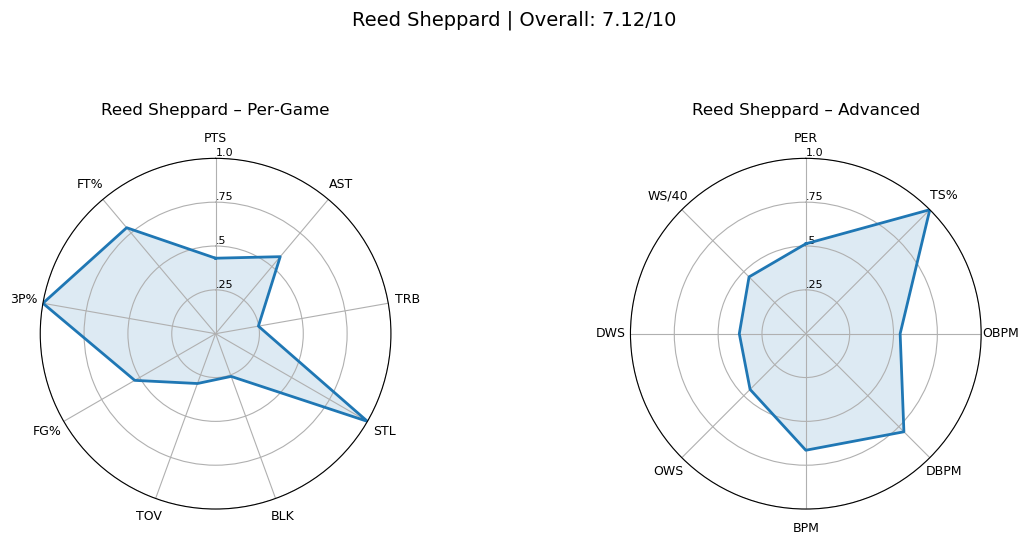

In [9]:
# %%
def show_prospect_radars(year, player_name, save=False):
    prof, cols_pg, cols_adv = build_profiles(year)
    row = prof[prof["Name"].str.lower() == player_name.lower()]
    if row.empty:
        print("Player not found.")
        return

    row = row.iloc[0]
    vals_pg  = row[[f"pg::{c}" for c in cols_pg]].values
    vals_adv = row[[f"adv::{c}" for c in cols_adv]].values

    fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(12,5))
    radar_plot(vals_pg,  cols_pg,  title=f"{row['Name']} – Per‑Game", ax=axs[0])
    radar_plot(vals_adv, cols_adv, title=f"{row['Name']} – Advanced", ax=axs[1])
    fig.suptitle(f"{row['Name']} | Overall: {row['OverallScore']}/10", y=1.08, fontsize=14)
    plt.tight_layout()
    plt.show()

    if save:
        os.makedirs(f"../reports/profiles/{year}", exist_ok=True)
        base = f"../reports/profiles/{year}/{row['Name'].replace(' ', '_')}"
        fig.savefig(base + "_radars.png", dpi=150, bbox_inches="tight")
        print("Saved:", base + "_radars.png")

# Example:
show_prospect_radars(2024, "Reed Sheppard", save=False)

In [10]:
# %%
def save_all_profiles(year):
    prof, cols_pg, cols_adv = build_profiles(year)
    outdir = f"../reports/profiles/{year}"
    os.makedirs(outdir, exist_ok=True)

    for _, r in prof.iterrows():
        name = r["Name"]
        vals_pg  = r[[f"pg::{c}" for c in cols_pg]].values
        vals_adv = r[[f"adv::{c}" for c in cols_adv]].values

        fig, axs = plt.subplots(1, 2, subplot_kw=dict(polar=True), figsize=(12,5))
        radar_plot(vals_pg,  cols_pg,  title=f"{name} – Per‑Game", ax=axs[0])
        radar_plot(vals_adv, cols_adv, title=f"{name} – Advanced", ax=axs[1])
        fig.suptitle(f"{name} | Overall: {r['OverallScore']}/10", y=1.08, fontsize=14)
        plt.tight_layout()

        base = os.path.join(outdir, f"{name.replace(' ', '_')}_radars.png")
        fig.savefig(base, dpi=120, bbox_inches="tight")
        plt.close(fig)

    # Also write a CSV with the overall score + classification + age
    prof[["Name","classification","Age","OverallScore"]].to_csv(
        f"../data/processed/{year}/prospect_profiles_{year}.csv", index=False
    )
    print("✅ Saved images to", outdir)
    print("✅ Saved score table to", f"../data/processed/{year}/prospect_profiles_{year}.csv")

# Example:
# save_all_profiles(2024)

In [11]:
# %%
def merge_profiles_with_comps(year):
    prof = pd.read_csv(f"../data/processed/{year}/prospect_profiles_{year}.csv")
    comps = pd.read_csv(f"../data/processed/{year}/prospect_comps_{year}.csv")

    merged = prof.merge(
        comps[["Name","Archetype","Comp1","Comp2","Comp3","Comp1_dist","Comp2_dist","Comp3_dist"]],
        on="Name", how="left"
    )
    merged.to_csv(f"../data/processed/{year}/prospect_profiles_with_comps_{year}.csv", index=False)
    print("✅ Saved:", f"../data/processed/{year}/prospect_profiles_with_comps_{year}.csv")

# Example:
# merge_profiles_with_comps(2024)

In [37]:
for year in range(2020, 2025):
    save_all_profiles(year)
    merge_profiles_with_comps(year)

✅ Saved images to ../reports/profiles/2020
✅ Saved score table to ../data/processed/2020/prospect_profiles_2020.csv
✅ Saved: ../data/processed/2020/prospect_profiles_with_comps_2020.csv
✅ Saved images to ../reports/profiles/2021
✅ Saved score table to ../data/processed/2021/prospect_profiles_2021.csv
✅ Saved: ../data/processed/2021/prospect_profiles_with_comps_2021.csv
✅ Saved images to ../reports/profiles/2022
✅ Saved score table to ../data/processed/2022/prospect_profiles_2022.csv
✅ Saved: ../data/processed/2022/prospect_profiles_with_comps_2022.csv
✅ Saved images to ../reports/profiles/2023
✅ Saved score table to ../data/processed/2023/prospect_profiles_2023.csv
✅ Saved: ../data/processed/2023/prospect_profiles_with_comps_2023.csv
✅ Saved images to ../reports/profiles/2024
✅ Saved score table to ../data/processed/2024/prospect_profiles_2024.csv
✅ Saved: ../data/processed/2024/prospect_profiles_with_comps_2024.csv


Top 10 prospects for 2024:
Zach Edey | Overall Score: 9.19/10


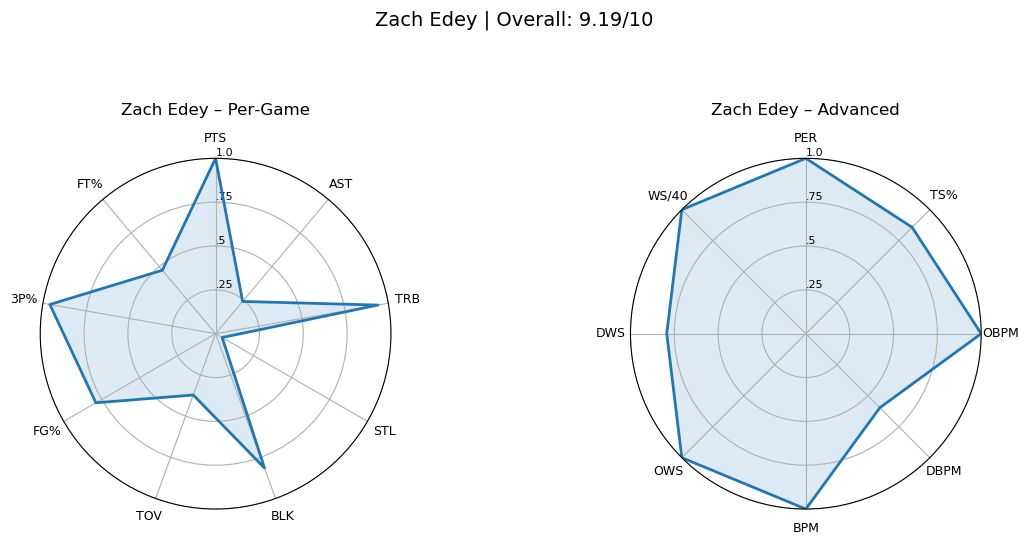

Saved: ../reports/profiles/2024/Zach_Edey_radars.png
DaRon Holmes II | Overall Score: 7.3/10


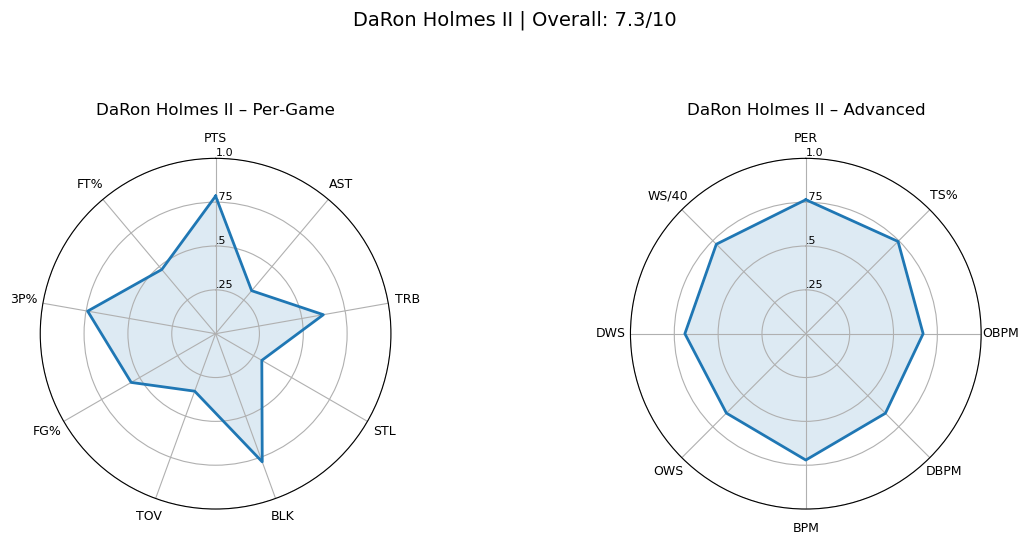

Saved: ../reports/profiles/2024/DaRon_Holmes_II_radars.png
N'Faly Dante | Overall Score: 7.17/10


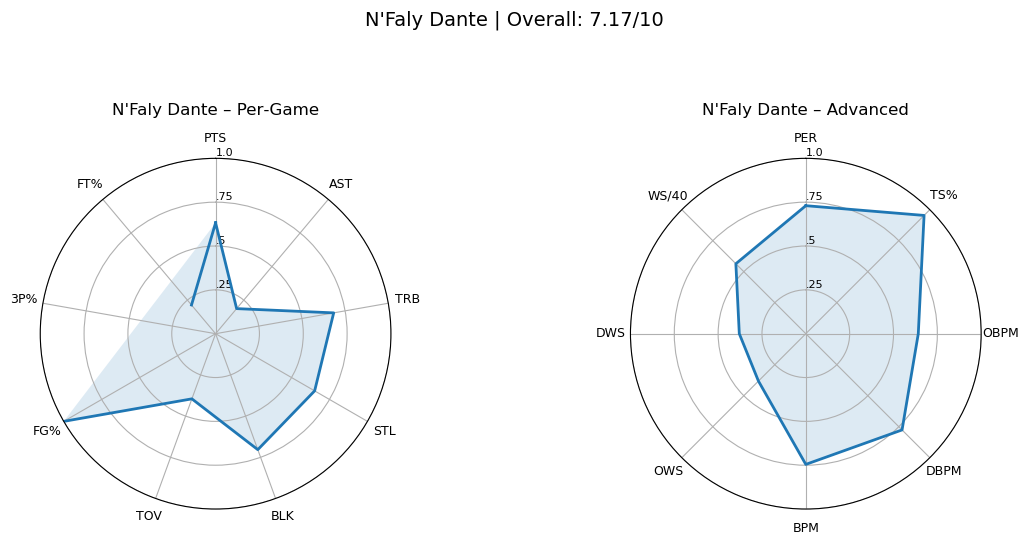

Saved: ../reports/profiles/2024/N'Faly_Dante_radars.png
Reed Sheppard | Overall Score: 7.12/10


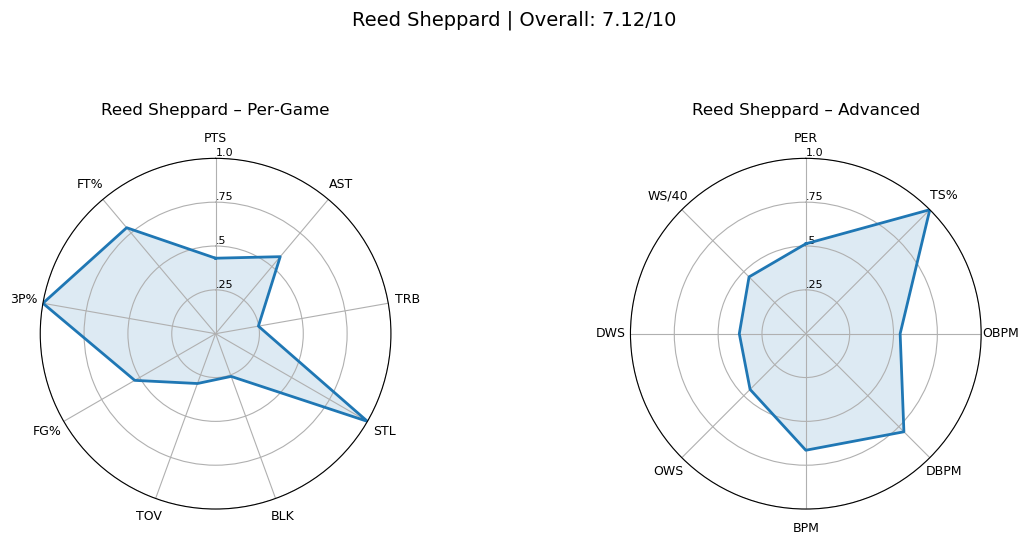

Saved: ../reports/profiles/2024/Reed_Sheppard_radars.png
Enrique Freeman | Overall Score: 7.04/10


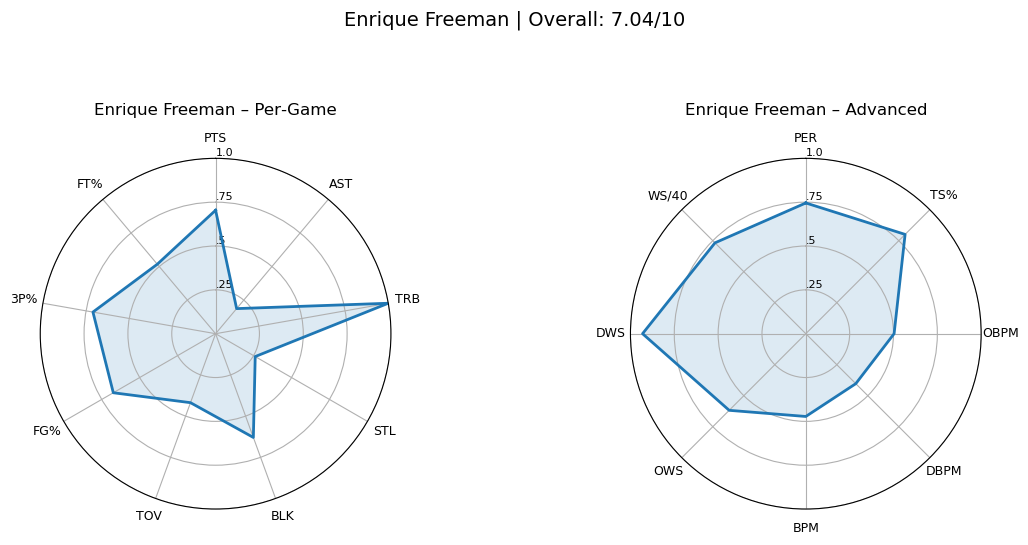

Saved: ../reports/profiles/2024/Enrique_Freeman_radars.png
Dillon Jones | Overall Score: 7.02/10


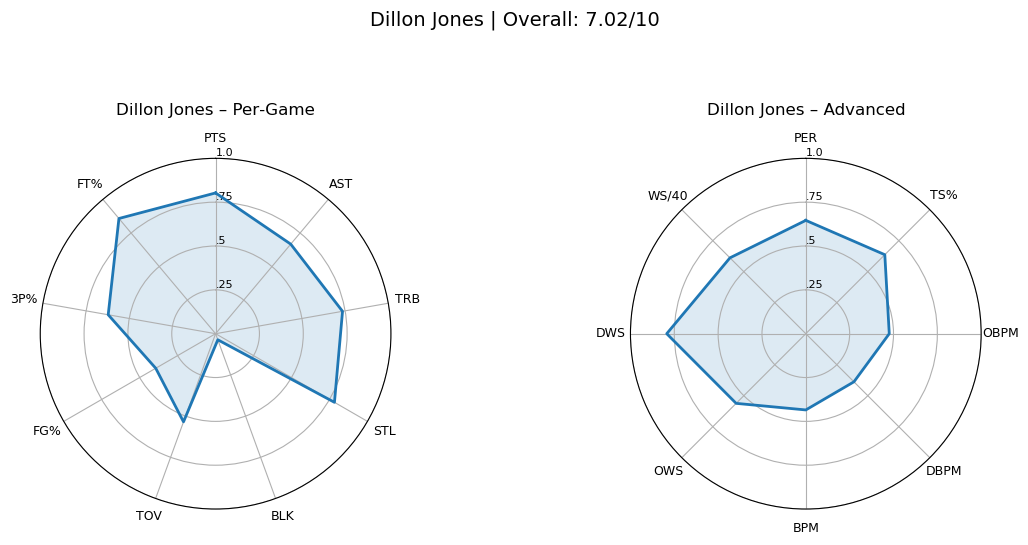

Saved: ../reports/profiles/2024/Dillon_Jones_radars.png
Devin Carter | Overall Score: 7.01/10


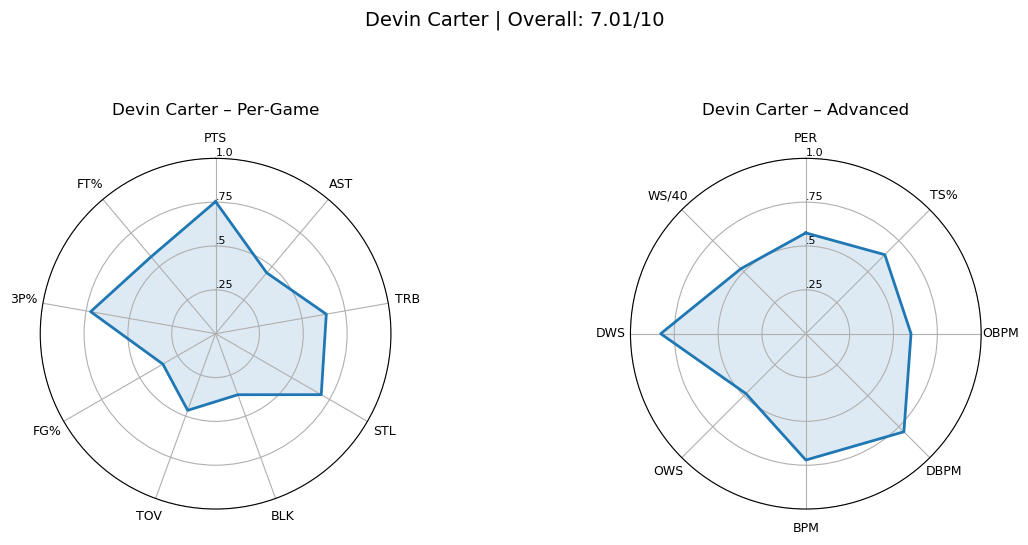

Saved: ../reports/profiles/2024/Devin_Carter_radars.png
Ulrich Chomche | Overall Score: 6.78/10


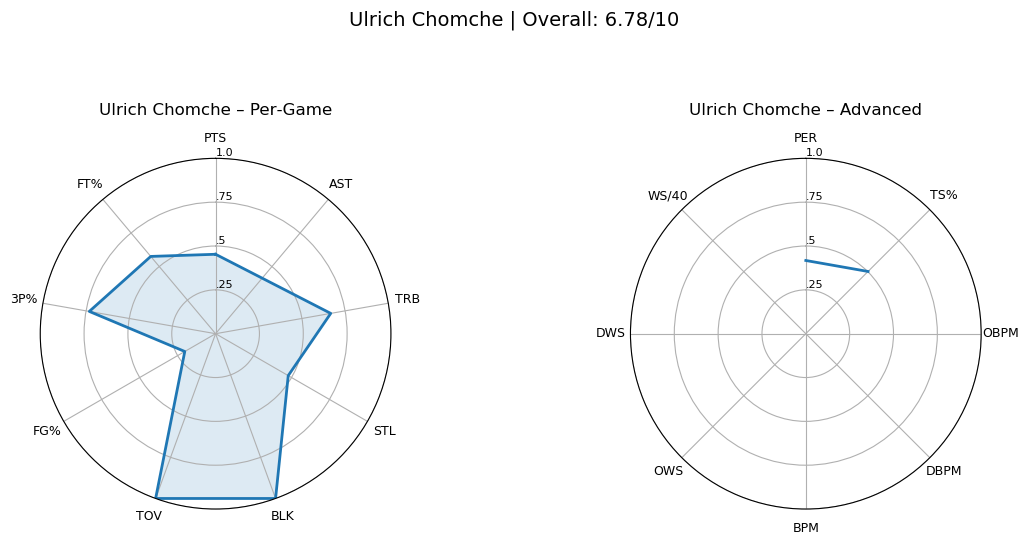

Saved: ../reports/profiles/2024/Ulrich_Chomche_radars.png
KJ Simpson | Overall Score: 6.73/10


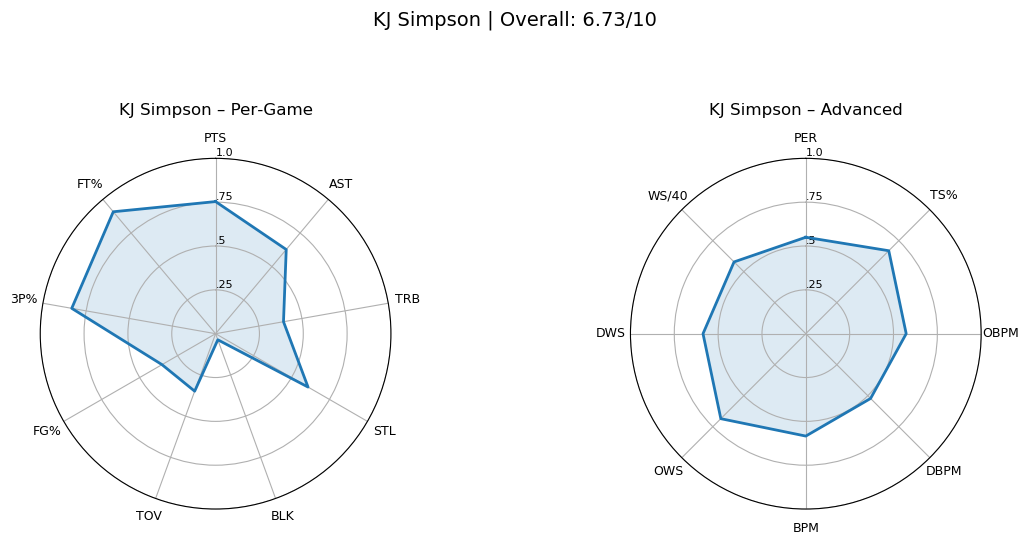

Saved: ../reports/profiles/2024/KJ_Simpson_radars.png
Donovan Clingan | Overall Score: 6.68/10


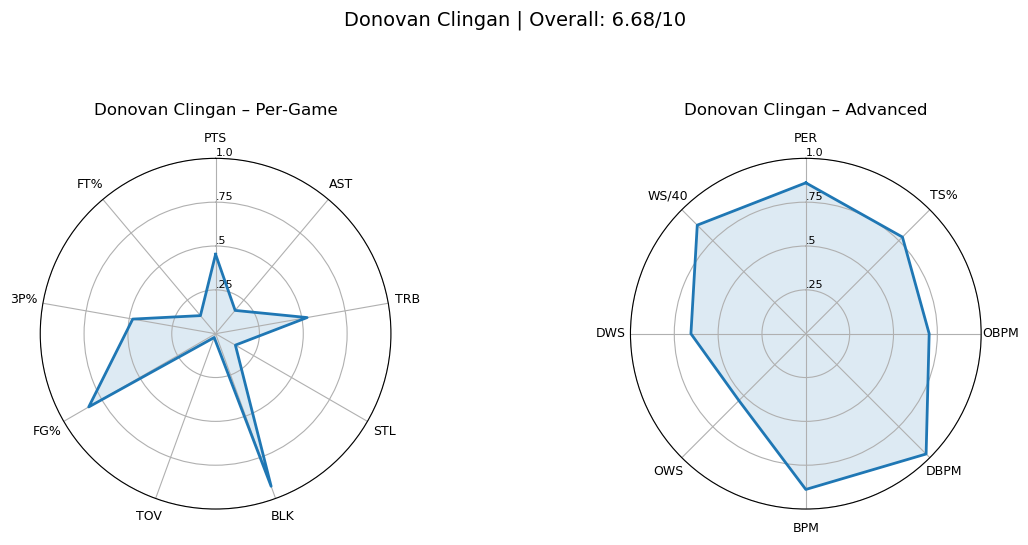

Saved: ../reports/profiles/2024/Donovan_Clingan_radars.png


In [18]:
# display top 10 prospects for 2024 (based on overallscore) and their profile pngs
def display_top_prospects(year, n=10):
    prof = pd.read_csv(f"../data/processed/{year}/prospect_profiles_with_upside_{year}.csv")
    top_prospects = prof.nlargest(n, "OverallScore")[["Name", "OverallScore"]]

    print(f"Top {n} prospects for {year}:")
    for _, row in top_prospects.iterrows():
        name = row["Name"]
        score = row["OverallScore"]
        print(f"{name} | Overall Score: {score}/10")
        show_prospect_radars(year, name, save=True)
        
display_top_prospects(2024, n=10)

Wemby's Overall Score: 60    6.94
Name: OverallScore, dtype: float64/10


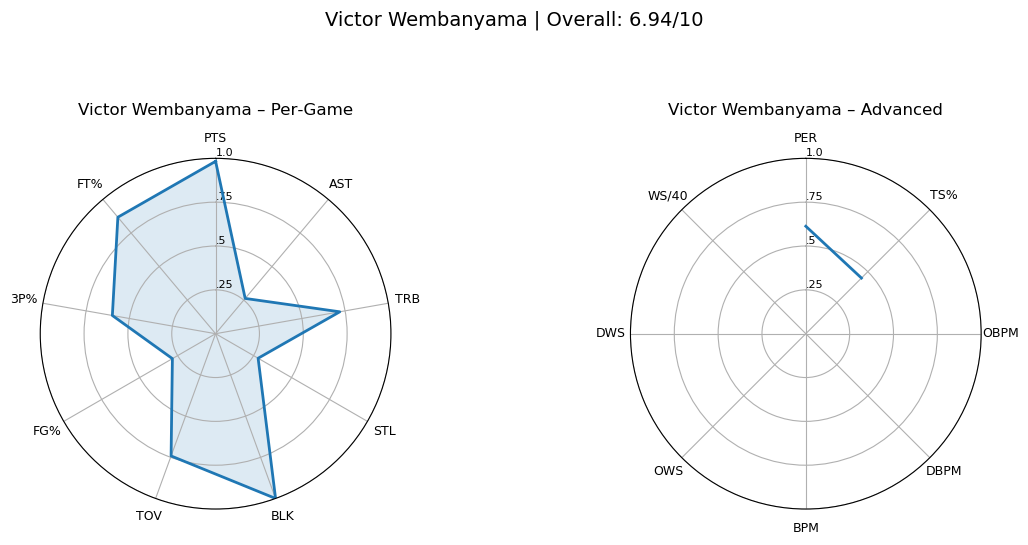

In [13]:
# test for vwemby
pool_2023 = pd.read_csv("../data/processed/2023/prospect_profiles_2023.csv")
wemby = pool_2023[pool_2023["Name"] == "Victor Wembanyama"]
score = wemby["OverallScore"]
print(f"Wemby's Overall Score: {score}/10")
show_prospect_radars(2023, "Victor Wembanyama", save=False)

In [15]:
# view our archetypes 
def archetype_overview(year, k=8, rename_map=None):
    """
    Rebuilds the NBA feature matrix for the given year using the SAME features
    you used in `run_prospect_comps`, refits KMeans(k), and returns:
      - nba_arche_df: NBA players with cluster + distance-to-centroid
      - summary: cluster counts and top-10 exemplars
    Optionally renames clusters via `rename_map` (e.g., {1:"3&D Wing", 2:"Roll Man", ...}).
    """
    # Load the same files & rebuild the aligned feature sets (like in run_prospect_comps)
    draft_path = f"../data/processed/{year}/draftpool_stats_{year}.csv"
    nba_path   = f"../data/processed/{year}/NBA_{year}.csv"
    draft_df = pd.read_csv(draft_path)
    nba_df   = pd.read_csv(nba_path)

    draft_df["Name"] = draft_df["Name"].str.strip()
    nba_df["player"] = nba_df["player"].str.strip()

    # Use the SAME mapping you declared earlier
    # (we reuse your `similarity_features`, `ensure_efg_col`, `to_numeric`, `coerce_percent_cols`, `median_impute`)
    draft_df = ensure_efg_col(draft_df)

    draft_cols_present = []
    for draft_col, _ in similarity_features:
        if draft_col in draft_df.columns:
            draft_cols_present.append(draft_col)
        elif draft_col == "eFG%" and "EFG%" in draft_df.columns:
            draft_cols_present.append("eFG%")

    draft_feats = draft_df[["Name", "classification", "Age"] + draft_cols_present].copy()

    nba_rename_map = {nba: draft for draft, nba in similarity_features if nba in nba_df.columns}
    nba_needed = list(nba_rename_map.keys())
    nba_feats = nba_df[["player", "age_x"] + nba_needed].copy().rename(columns=nba_rename_map)
    nba_feats = nba_feats.rename(columns={"player": "NBA_Player", "age_x": "NBA_Age"})

    cols_in_both = [c for c in [f[0] for f in similarity_features]
                    if c in draft_feats.columns and c in nba_feats.columns]

    # Coerce/normalize/scale exactly like before (fit scaler on NBA)
    draft_feats = to_numeric(draft_feats, cols_in_both + ["Age"])
    nba_feats   = to_numeric(nba_feats,   cols_in_both + ["NBA_Age"])

    percent_like = ["FG%", "3P%", "FT%", "TS%", "eFG%", "AST%", "TRB%", "STL%", "BLK%", "TOV%", "USG%"]
    draft_feats = coerce_percent_cols(draft_feats, [c for c in percent_like if c in draft_feats.columns])
    nba_feats   = coerce_percent_cols(nba_feats,   [c for c in percent_like if c in nba_feats.columns])

    draft_feats = median_impute(draft_feats, cols_in_both)
    nba_feats   = median_impute(nba_feats,   cols_in_both)

    scaler = StandardScaler()
    nba_X    = scaler.fit_transform(nba_feats[cols_in_both].values)

    # Fit KMeans on NBA only (like comps)
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(nba_X)

    labels = km.labels_
    centers = km.cluster_centers_

    # Distance to own centroid (in standardized space)
    dists = np.array([norm(nba_X[i] - centers[labels[i]]) for i in range(nba_X.shape[0])])

    nba_arche_df = pd.DataFrame({
        "NBA_Player": nba_feats["NBA_Player"],
        "Cluster": labels + 1,  # 1-indexed
        "DistToCentroid": dists
    })

    # Optional names
    if rename_map:
        nba_arche_df["ArchetypeName"] = nba_arche_df["Cluster"].map(rename_map).fillna(nba_arche_df["Cluster"].astype(str))
    else:
        nba_arche_df["ArchetypeName"] = nba_arche_df["Cluster"].astype(str)

    # Summary: counts & exemplars (closest 10 per cluster)
    summary_rows = []
    for c in sorted(nba_arche_df["Cluster"].unique()):
        sub = nba_arche_df[nba_arche_df["Cluster"] == c].sort_values("DistToCentroid").head(10)
        summary_rows.append({
            "Cluster": c,
            "ArchetypeName": sub["ArchetypeName"].iloc[0],
            "Count": (nba_arche_df["Cluster"] == c).sum(),
            "Top_Examples": ", ".join(sub["NBA_Player"].tolist())
        })
    summary = pd.DataFrame(summary_rows).sort_values("Cluster")

    # Save both for inspection or renaming offline
    out_dir = f"../data/processed/{year}"
    os.makedirs(out_dir, exist_ok=True)
    nba_arche_df.to_csv(os.path.join(out_dir, f"nba_archetypes_{year}.csv"), index=False)
    summary.to_csv(os.path.join(out_dir, f"nba_archetypes_summary_{year}.csv"), index=False)
    print("✅ Wrote:")
    print("  -", os.path.join(out_dir, f"nba_archetypes_{year}.csv"))
    print("  -", os.path.join(out_dir, f"nba_archetypes_summary_{year}.csv"))

    display(summary.head(10))
    return nba_arche_df, summary

# Example (start with unnamed, inspect, then craft a rename_map):
nba_arche_df_2024, summary_2024 = archetype_overview(2024, k=8)
# rename_map = {1:"Pull-Up Guard", 2:"3&D Wing", 3:"Switch Big", 4:"Slasher", 5:"Point-Center", 6:"Microwave Scorer", 7:"Floor General", 8:"Stretch Big"}
# nba_arche_df_2024_named, summary_2024_named = archetype_overview(2024, k=8, rename_map=rename_map)

✅ Wrote:
  - ../data/processed/2024/nba_archetypes_2024.csv
  - ../data/processed/2024/nba_archetypes_summary_2024.csv


,Cluster,ArchetypeName,Count,Top_Examples
0,1,1,54,"Evan Mobley, Jakob Poeltl, Paul Reed, Precious..."
1,2,2,152,"Danilo Gallinari, Max Christie, Bryce McGowens..."
2,3,3,72,"Noah Clowney, Richaun Holmes, Richaun Holmes, ..."
3,4,4,25,"Jalen Hood-Schifino, Jamaree Bouyea, Alex Fudg..."
4,5,5,123,"Jalen McDaniels, Isaiah Livers, Julian Strawth..."
5,6,6,105,"Brandon Ingram, Khris Middleton, Bradley Beal,..."
6,7,7,202,"Kevin Huerter, Naji Marshall, Caleb Martin, Go..."
7,8,8,2,"Hamidou Diallo, Markquis Nowell"


In [16]:
# evaluate comps quality using all-star selections
def load_allstar_counts():
    """
    Returns a Series: index=player name, value=number of All-Star selections.
    If 'replaced' column exists, we count every row as an appearance; tweak if you want to
    down-weight injury replacements (e.g., df[df['replaced'].isna()]).
    """
    path = "../data/nbadataset/All-Star Selections.csv"
    df = pd.read_csv(path)
    df["player"] = df["player"].str.strip()
    counts = df.groupby("player").size().rename("AllStarSelections")
    return counts

# evaluate upside 
def compute_upside_from_comps(year, epsilon=1e-6):
    """
    Reads comps file for `year`, attaches All-Star counts for Comp1–3,
    computes distance-weighted sum, normalizes to 0..1 and /10.
    Writes `prospect_upside_{year}.csv`.
    """
    comps = pd.read_csv(f"../data/processed/{year}/prospect_comps_{year}.csv").copy()
    counts = load_allstar_counts()

    # Attach counts; missing → 0
    for i in (1,2,3):
        comps[f"Comp{i}_AllStars"] = comps[f"Comp{i}"].map(counts).fillna(0).astype(float)

    # Inverse-distance weights (closer comps count more)
    # Normalize weights per row
    for i in (1,2,3):
        comps[f"w{i}"] = 1.0 / (epsilon + comps[f"Comp{i}_dist"].astype(float))

    wsum = comps[["w1","w2","w3"]].sum(axis=1).replace(0, np.nan)
    for i in (1,2,3):
        comps[f"w{i}"] = comps[f"w{i}"] / wsum

    # Weighted All-Star total
    comps["UpsideRaw"] = (
        comps["w1"]*comps["Comp1_AllStars"] +
        comps["w2"]*comps["Comp2_AllStars"] +
        comps["w3"]*comps["Comp3_AllStars"]
    ).fillna(0.0)

    # Normalize across class to 0..1, then /10
    mn, mx = comps["UpsideRaw"].min(), comps["UpsideRaw"].max()
    if mx == mn:
        comps["Upside01"] = 0.5
    else:
        comps["Upside01"] = (comps["UpsideRaw"] - mn) / (mx - mn)
    comps["UpsideScore"] = (comps["Upside01"] * 10).round(2)

    out = comps[["Name","Archetype","Comp1","Comp2","Comp3",
                 "Comp1_AllStars","Comp2_AllStars","Comp3_AllStars",
                 "UpsideRaw","Upside01","UpsideScore"]].copy()
    out_path = f"../data/processed/{year}/prospect_upside_{year}.csv"
    out.to_csv(out_path, index=False)
    print("✅ Saved:", out_path)
    display(out.head(10))
    return out

# Example:
for y in range(2020, 2025):
    compute_upside_from_comps(y)

✅ Saved: ../data/processed/2020/prospect_upside_2020.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_AllStars,Comp2_AllStars,Comp3_AllStars,UpsideRaw,Upside01,UpsideScore
0,Anthony Edwards,2,Paul George,Jayson Tatum,Zach LaVine,9.0,5.0,2.0,5.594810,0.621600,6.22
1,James Wiseman,5,Hassan Whiteside,Mitchell Robinson,Anthony Davis,0.0,0.0,9.0,2.902230,0.322446,3.22
2,Patrick Williams,5,Gorgui Dieng,Gorgui Dieng,Gorgui Dieng,0.0,0.0,0.0,0.000000,0.000000,0.00
3,Isaac Okoro,8,James Johnson,Shai Gilgeous-Alexander,Nemanja Bjelica,0.0,2.0,0.0,0.659968,0.073324,0.73
4,Onyeka Okongwu,5,Anthony Davis,Jonathan Isaac,Mitchell Robinson,9.0,0.0,0.0,3.350581,0.372259,3.72
5,Obi Toppin,2,Karl-Anthony Towns,John Collins,Jayson Tatum,4.0,0.0,5.0,3.028819,0.336511,3.37
6,Jalen Smith,5,Anthony Davis,Hassan Whiteside,Rudy Gobert,9.0,0.0,3.0,4.072278,0.452442,4.52
7,Devin Vassell,5,Jae Crowder,OG Anunoby,Gorgui Dieng,0.0,0.0,0.0,0.000000,0.000000,0.00
8,Tyrese Haliburton,2,Ben Simmons,Jimmy Butler,Chris Paul,3.0,6.0,12.0,6.917304,0.768533,7.69
9,Kira Lewis Jr.,2,Jrue Holiday,Kyle Lowry,Jimmy Butler,2.0,6.0,6.0,4.554559,0.506025,5.06


✅ Saved: ../data/processed/2021/prospect_upside_2021.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_AllStars,Comp2_AllStars,Comp3_AllStars,UpsideRaw,Upside01,UpsideScore
0,Cade Cunningham,7,Paul George,LaMelo Ball,Kelly Olynyk,9.0,1.0,0.0,3.550976,0.334754,3.35
1,Evan Mobley,1,Myles Turner,Anthony Davis,Rudy Gobert,0.0,9.0,3.0,3.900211,0.367677,3.68
2,Scottie Barnes,7,Thaddeus Young,Ben Simmons,LaMelo Ball,0.0,3.0,1.0,1.323781,0.124794,1.25
3,Jalen Suggs,7,LaMelo Ball,Ben Simmons,Delon Wright,1.0,3.0,0.0,1.357859,0.128007,1.28
4,Franz Wagner,8,Kyle Anderson,Al Horford,De'Anthony Melton,0.0,5.0,0.0,1.648553,0.155411,1.55
5,Davion Mitchell,7,T.J. McConnell,Jrue Holiday,Delon Wright,0.0,2.0,0.0,0.668784,0.063047,0.63
6,Ziaire Williams,5,Josh Jackson,Nickeil Alexander-Walker,Talen Horton-Tucker,0.0,0.0,0.0,0.000000,0.000000,0.00
7,James Bouknight,7,Jaylen Brown,Jayson Tatum,Jordan Clarkson,3.0,5.0,0.0,2.677965,0.252454,2.52
8,Joshua Primo,8,Abdel Nader,Jae Crowder,Dylan Windler,0.0,0.0,0.0,0.000000,0.000000,0.00
9,Chris Duarte,7,OG Anunoby,Jrue Holiday,De'Anthony Melton,0.0,2.0,0.0,0.667856,0.062959,0.63


✅ Saved: ../data/processed/2022/prospect_upside_2022.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_AllStars,Comp2_AllStars,Comp3_AllStars,UpsideRaw,Upside01,UpsideScore
0,Paolo Banchero,5,Pascal Siakam,Miles Bridges,Karl-Anthony Towns,2.0,0.0,4.0,1.995782,0.512589,5.13
1,Chet Holmgren,2,Myles Turner,Robert Williams,Anthony Davis,0.0,0.0,9.0,2.763895,0.709868,7.10
2,Jabari Smith,2,Kristaps Porziņģis,Kristaps Porziņģis,Karl-Anthony Towns,1.0,1.0,4.0,1.972215,0.506536,5.07
3,Keegan Murray,2,Kristaps Porziņģis,Kristaps Porziņģis,Anthony Davis,1.0,1.0,9.0,3.568222,0.916449,9.16
4,Jaden Ivey,5,Jaylen Brown,Anthony Edwards,Josh Hart,3.0,2.0,0.0,1.732193,0.444890,4.45
5,Bennedict Mathurin,8,Desmond Bane,Bogdan Bogdanović,Jaylen Brown,0.0,0.0,3.0,0.930402,0.238961,2.39
6,Jeremy Sochan,2,Kyle Anderson,Thaddeus Young,De'Anthony Melton,0.0,0.0,0.0,0.000000,0.000000,0.00
7,Johnny Davis,5,Jayson Tatum,Pascal Siakam,Jaylen Brown,5.0,2.0,3.0,3.404306,0.874349,8.74
8,Jalen Williams,5,Josh Hart,Mike Conley,Anthony Edwards,0.0,1.0,2.0,0.979974,0.251693,2.52
9,Jalen Duren,2,Robert Williams,Anthony Davis,Myles Turner,0.0,9.0,0.0,2.885483,0.741096,7.41


✅ Saved: ../data/processed/2023/prospect_upside_2023.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_AllStars,Comp2_AllStars,Comp3_AllStars,UpsideRaw,Upside01,UpsideScore
0,Brandon Miller,6,Kristaps Porziņģis,Karl-Anthony Towns,Kawhi Leonard,1.0,4.0,6.0,3.630986,0.473919,4.74
1,Anthony Black,3,Markelle Fultz,OG Anunoby,Victor Oladipo,0.0,0.0,2.0,0.652076,0.085110,0.85
2,Jarace Walker,1,Aleksej Pokusevski,Evan Mobley,Naz Reid,0.0,0.0,0.0,0.000000,0.000000,0.00
3,Taylor Hendricks,1,Myles Turner,Kristaps Porziņģis,Aleksej Pokusevski,0.0,1.0,0.0,0.332492,0.043397,0.43
4,Cason Wallace,3,Delon Wright,Markelle Fultz,De'Anthony Melton,0.0,0.0,0.0,0.000000,0.000000,0.00
5,Jett Howard,3,Bogdan Bogdanović,Alec Burks,Jerami Grant,0.0,0.0,0.0,0.000000,0.000000,0.00
6,Dereck Lively II,1,Walker Kessler,Nic Claxton,Isaiah Jackson,0.0,0.0,0.0,0.000000,0.000000,0.00
7,Gradey Dick,3,Cameron Johnson,Cameron Johnson,Buddy Hield,0.0,0.0,0.0,0.000000,0.000000,0.00
8,Jordan Hawkins,3,Alec Burks,Norman Powell,Cameron Johnson,0.0,0.0,0.0,0.000000,0.000000,0.00
9,Kobe Bufkin,3,Jalen Williams,Mikal Bridges,De'Anthony Melton,0.0,0.0,0.0,0.000000,0.000000,0.00


✅ Saved: ../data/processed/2024/prospect_upside_2024.csv


,Name,Archetype,Comp1,Comp2,Comp3,Comp1_AllStars,Comp2_AllStars,Comp3_AllStars,UpsideRaw,Upside01,UpsideScore
0,Reed Sheppard,6,Alex Caruso,Scotty Pippen Jr.,Jalen Suggs,0.0,0.0,0.0,0.000000,0.000000,0.00
1,Stephon Castle,7,Cole Anthony,Max Strus,Markelle Fultz,0.0,0.0,0.0,0.000000,0.000000,0.00
2,Donovan Clingan,1,Daniel Gafford,Walker Kessler,Chet Holmgren,0.0,0.0,0.0,0.000000,0.000000,0.00
3,Rob Dillingham,6,Collin Sexton,Khris Middleton,Terry Rozier,0.0,3.0,0.0,0.981146,0.138779,1.39
4,Zach Edey,1,Anthony Davis,Kristaps Porziņģis,Chet Holmgren,9.0,1.0,0.0,3.468922,0.490664,4.91
5,Cody Williams,7,Ayo Dosunmu,OG Anunoby,Naz Reid,0.0,0.0,0.0,0.000000,0.000000,0.00
6,Devin Carter,6,Alperen Şengün,Scottie Barnes,Kawhi Leonard,0.0,1.0,6.0,2.254962,0.318955,3.19
7,Carlton Carrington,6,Zach LaVine,Tyler Herro,Cole Anthony,2.0,0.0,0.0,0.669884,0.094752,0.95
8,Kel'el Ware,1,Chet Holmgren,Myles Turner,Evan Mobley,0.0,0.0,0.0,0.000000,0.000000,0.00
9,Jared McCain,7,Donte DiVincenzo,Simone Fontecchio,Cameron Johnson,0.0,0.0,0.0,0.000000,0.000000,0.00


In [17]:
# %%
def merge_profiles_with_upside_and_update_score(year, upside_weight=0.20, age_weight=0.10):
    """
    Merges (existing) prospect_profiles_{year}.csv with computed Upside,
    and recalculates an UpdatedOverall (still /10) that includes Upside.
    
    Default weighting (sums to 1.0):
      per-game index:   0.45
      advanced index:   0.45
      age bonus:        age_weight (default 0.10)
      upside:           upside_weight (default 0.20)
    To keep total ≈ 1, reduce the others proportionally when you raise upside_weight.
    """
    # Rebuild profiles (to get normalized components) OR load the saved file if you prefer.
    prof, cols_pg, cols_adv = build_profiles(year)

    # Load Upside
    ups = pd.read_csv(f"../data/processed/{year}/prospect_upside_{year}.csv")

    # Merge
    merged = prof.merge(ups[["Name","Upside01","UpsideScore","Comp1","Comp2","Comp3"]],
                        on="Name", how="left")

    # Recreate the internal components used in build_profiles to reweight cleanly:
    # We’ll reconstruct pg01/adv01/age01 to combine with Upside01, but we didn’t save them.
    # So rebuild the z-indexes quickly:
    draft = pd.read_csv(f"../data/processed/{year}/draftpool_stats_{year}.csv").copy()
    draft["Name"] = draft["Name"].str.strip()
    _to_numeric(draft, cols_pg + cols_adv + ["Age"])
    draft = _coerce_percent(draft, [c for c in cols_pg + cols_adv if "%" in c])

    z_pg  = draft[cols_pg].apply(zscore, axis=0)
    z_adv = draft[cols_adv].apply(zscore, axis=0)

    def weighted_mean(row, weights):
        if not weights: return 0.0
        tot_w = sum(weights.values())
        if tot_w == 0: return 0.0
        s = 0.0
        for k, w in weights.items():
            if k in row and not pd.isna(row[k]):
                s += row[k] * w
        return s / tot_w

    pergame_weights = {c:1.0 for c in cols_pg}
    advanced_weights = {c:1.0 for c in cols_adv}

    pg_index  = z_pg.apply(lambda r: weighted_mean(r, pergame_weights), axis=1)
    adv_index = z_adv.apply(lambda r: weighted_mean(r, advanced_weights), axis=1)

    # Normalize to 0..1
    def _mm01(s):
        mn, mx = s.min(), s.max()
        return (s - mn) / (mx - mn) if mx != mn else s*0 + 0.5
    pg01  = _mm01(pg_index)
    adv01 = _mm01(adv_index)

    # Age bonus (0..1; younger better)
    age_min, age_max = draft["Age"].min(), draft["Age"].max()
    if pd.isna(age_min) or pd.isna(age_max) or age_min == age_max:
        age01 = pd.Series(0.0, index=draft.index)
    else:
        age01 = 1 - (draft["Age"] - age_min) / (age_max - age_min)

    # Attach to merged by Name
    tmp = pd.DataFrame({
        "Name": draft["Name"],
        "pg01":  pg01,
        "adv01": adv01,
        "age01": age01
    })
    merged = merged.merge(tmp, on="Name", how="left")

    # If Upside missing for some players (no comps), set to class median
    merged["Upside01"] = merged["Upside01"].fillna(merged["Upside01"].median())

    # Reweight to include Upside; keep total ≈ 1.0
    w_pg, w_adv = 0.45, 0.45
    w_age       = age_weight
    w_up        = upside_weight

    # Renormalize the base weights so w_pg + w_adv + w_age + w_up = 1
    total = w_pg + w_adv + w_age + w_up
    w_pg, w_adv, w_age, w_up = (w_pg/total, w_adv/total, w_age/total, w_up/total)

    merged["UpdatedOverall01"] = (
        w_pg*merged["pg01"] + w_adv*merged["adv01"] + w_age*merged["age01"] + w_up*merged["Upside01"]
    )
    merged["UpdatedOverall"] = (merged["UpdatedOverall01"] * 10).round(2)

    # Save
    out_path = f"../data/processed/{year}/prospect_profiles_with_upside_{year}.csv"
    merged.to_csv(out_path, index=False)
    print("✅ Saved:", out_path)
    display(merged.head(10))
    return merged

# Examples:
for y in range(2020, 2025):
    merge_profiles_with_upside_and_update_score(y, upside_weight=0.20, age_weight=0.10)

✅ Saved: ../data/processed/2020/prospect_profiles_with_upside_2020.csv


,Name,classification,Age,pg::PTS,pg::AST,pg::TRB,pg::STL,pg::BLK,pg::TOV,pg::FG%,...,Upside01,UpsideScore,Comp1,Comp2,Comp3,pg01,adv01,age01,UpdatedOverall01,UpdatedOverall
0,Anthony Edwards,College,18.87,0.646341,0.393939,0.396040,0.500000,0.200000,0.724138,0.087065,...,0.621600,6.22,Paul George,Jayson Tatum,Zach LaVine,0.673241,0.410845,0.930481,0.587673,5.88
1,James Wiseman,College,19.22,0.670732,0.015152,0.940594,0.083333,1.000000,0.137931,1.000000,...,0.322446,3.22,Hassan Whiteside,Mitchell Robinson,Anthony Davis,0.670491,1.000000,0.868093,0.752516,7.53
2,Patrick Williams,College,18.87,0.243902,0.121212,0.277228,0.375000,0.333333,0.379310,0.228856,...,0.000000,0.00,Gorgui Dieng,Gorgui Dieng,Gorgui Dieng,0.528074,0.433096,0.930481,0.437979,4.38
3,Isaac Okoro,College,19.39,0.394309,0.272727,0.316832,0.333333,0.300000,0.482759,0.365672,...,0.073324,0.73,James Johnson,Shai Gilgeous-Alexander,Nemanja Bjelica,0.536006,0.475555,0.837790,0.461372,4.61
4,Onyeka Okongwu,College,19.52,0.528455,0.136364,0.732673,0.458333,0.900000,0.482759,0.619403,...,0.372259,3.72,Anthony Davis,Jonathan Isaac,Mitchell Robinson,0.796150,0.796075,0.814617,0.727012,7.27
5,Obi Toppin,College,22.29,0.682927,0.303030,0.623762,0.375000,0.400000,0.551724,0.661692,...,0.336511,3.37,Karl-Anthony Towns,John Collins,Jayson Tatum,0.823961,0.873230,0.320856,0.719269,7.19
6,Jalen Smith,College,20.26,0.500000,0.090909,0.920792,0.250000,0.800000,0.379310,0.425373,...,0.452442,4.52,Anthony Davis,Hassan Whiteside,Rudy Gobert,0.764987,0.804203,0.682709,0.720745,7.21
7,Devin Vassell,College,19.82,0.386179,0.212121,0.386139,0.541667,0.333333,0.068966,0.305970,...,0.000000,0.00,Jae Crowder,OG Anunoby,Gorgui Dieng,0.594010,0.676261,0.761141,0.539780,5.40
8,Tyrese Haliburton,College,20.30,0.487805,0.954545,0.465347,1.000000,0.233333,0.758621,0.340796,...,0.768533,7.69,Ben Simmons,Jimmy Butler,Chris Paul,1.000000,0.663580,0.675579,0.808230,8.08
9,Kira Lewis Jr.,College,19.20,0.621951,0.757576,0.356436,0.708333,0.200000,1.000000,0.228856,...,0.506025,5.06,Jrue Holiday,Kyle Lowry,Jimmy Butler,0.894027,0.452609,0.871658,0.661964,6.62


✅ Saved: ../data/processed/2021/prospect_profiles_with_upside_2021.csv


,Name,classification,Age,pg::PTS,pg::AST,pg::TRB,pg::STL,pg::BLK,pg::TOV,pg::FG%,...,Upside01,UpsideScore,Comp1,Comp2,Comp3,pg01,adv01,age01,UpdatedOverall01,UpdatedOverall
0,Cade Cunningham,College,19.73,0.813953,0.402597,0.490566,0.764706,0.242424,0.944444,0.198758,...,0.334754,3.35,Paul George,LaMelo Ball,Kelly Olynyk,1.000000,0.587385,0.773960,0.715558,7.16
1,Evan Mobley,College,20.00,0.641860,0.259740,0.726415,0.294118,0.878788,0.444444,0.633540,...,0.367677,3.68,Myles Turner,Anthony Davis,Rudy Gobert,0.889403,1.000000,0.725136,0.830233,8.30
2,Scottie Barnes,College,19.88,0.358140,0.480519,0.283019,0.705882,0.151515,0.527778,0.400621,...,0.124794,1.25,Thaddeus Young,Ben Simmons,LaMelo Ball,0.567126,0.494672,0.746835,0.481210,4.81
3,Jalen Suggs,College,19.99,0.548837,0.532468,0.405660,0.941176,0.090909,0.638889,0.400621,...,0.128007,1.28,LaMelo Ball,Ben Simmons,Delon Wright,0.835177,0.710083,0.726944,0.661386,6.61
4,Franz Wagner,College,19.81,0.460465,0.337662,0.518868,0.588235,0.303030,0.194444,0.319876,...,0.155411,1.55,Kyle Anderson,Al Horford,De'Anthony Melton,0.693464,0.779993,0.759494,0.641739,6.42
5,Davion Mitchell,College,22.79,0.530233,0.662338,0.160377,0.941176,0.121212,0.500000,0.425466,...,0.063047,0.63,T.J. McConnell,Jrue Holiday,Delon Wright,0.748028,0.748371,0.220615,0.590042,5.90
6,Ziaire Williams,College,19.77,0.376744,0.233766,0.339623,0.352941,0.181818,0.638889,0.000000,...,0.000000,0.00,Josh Jackson,Nickeil Alexander-Walker,Talen Horton-Tucker,0.498243,0.030807,0.766727,0.262288,2.62
7,James Bouknight,College,20.75,0.748837,0.181818,0.443396,0.470588,0.090909,0.611111,0.226708,...,0.252454,2.52,Jaylen Brown,Jayson Tatum,Jordan Clarkson,0.654861,0.504922,0.589512,0.526120,5.26
8,Joshua Primo,College,18.48,0.255814,0.051948,0.226415,0.176471,0.090909,0.222222,0.177019,...,0.000000,0.00,Abdel Nader,Jae Crowder,Dylan Windler,0.283764,0.297138,1.000000,0.301171,3.01
9,Chris Duarte,College,24.01,0.674419,0.298701,0.339623,0.941176,0.242424,0.472222,0.490683,...,0.062959,0.63,OG Anunoby,Jrue Holiday,De'Anthony Melton,0.881822,0.798646,0.000000,0.640669,6.41


✅ Saved: ../data/processed/2022/prospect_profiles_with_upside_2022.csv


,Name,classification,Age,pg::PTS,pg::AST,pg::TRB,pg::STL,pg::BLK,pg::TOV,pg::FG%,...,Upside01,UpsideScore,Comp1,Comp2,Comp3,pg01,adv01,age01,UpdatedOverall01,UpdatedOverall
0,Paolo Banchero,College,19.60,0.705607,0.535714,0.681818,0.421053,0.195652,0.612903,0.390977,...,0.512589,5.13,Pascal Siakam,Miles Bridges,Karl-Anthony Towns,0.856236,0.597482,0.802326,0.697436,6.97
1,Chet Holmgren,College,20.13,0.560748,0.303571,0.920455,0.263158,0.804348,0.451613,0.714286,...,0.709868,7.10,Myles Turner,Robert Williams,Anthony Davis,0.995585,0.971658,0.699612,0.914328,9.14
2,Jabari Smith,College,19.10,0.691589,0.321429,0.636364,0.421053,0.217391,0.451613,0.268170,...,0.506536,5.07,Kristaps Porziņģis,Kristaps Porziņģis,Karl-Anthony Towns,0.818847,0.694698,0.899225,0.726938,7.27
3,Keegan Murray,College,21.83,1.000000,0.232143,0.784091,0.526316,0.413043,0.193548,0.581454,...,0.916449,9.16,Kristaps Porziņģis,Kristaps Porziņģis,Anthony Davis,0.945610,1.000000,0.370155,0.913191,9.13
4,Jaden Ivey,College,20.35,0.710280,0.517857,0.352273,0.315789,0.130435,0.677419,0.345865,...,0.444890,4.45,Jaylen Brown,Anthony Edwards,Josh Hart,0.775998,0.534491,0.656977,0.620330,6.20
5,Bennedict Mathurin,College,20.00,0.728972,0.410714,0.431818,0.368421,0.065217,0.419355,0.320802,...,0.238961,2.39,Desmond Bane,Bogdan Bogdanović,Jaylen Brown,0.725250,0.603674,0.724806,0.598574,5.99
6,Jeremy Sochan,College,19.08,0.331776,0.285714,0.522727,0.526316,0.152174,0.354839,0.380952,...,0.000000,0.00,Kyle Anderson,Thaddeus Young,De'Anthony Melton,0.564478,0.506848,0.903101,0.477006,4.77
7,Johnny Davis,College,20.31,0.822430,0.339286,0.727273,0.473684,0.152174,0.580645,0.263158,...,0.874349,8.74,Jayson Tatum,Pascal Siakam,Jaylen Brown,0.837624,0.549159,0.664729,0.721162,7.21
8,Jalen Williams,College,21.18,0.742991,0.714286,0.295455,0.473684,0.108696,0.516129,0.478697,...,0.251693,2.52,Josh Hart,Mike Conley,Anthony Edwards,0.881583,0.527995,0.496124,0.611884,6.12
9,Jalen Duren,College,18.58,0.462617,0.196429,0.715909,0.263158,0.456522,0.548387,0.689223,...,0.741096,7.41,Robert Williams,Anthony Davis,Myles Turner,0.643441,0.541000,1.000000,0.651015,6.51


✅ Saved: ../data/processed/2023/prospect_profiles_with_upside_2023.csv


,Name,classification,Age,pg::PTS,pg::AST,pg::TRB,pg::STL,pg::BLK,pg::TOV,pg::FG%,...,Upside01,UpsideScore,Comp1,Comp2,Comp3,pg01,adv01,age01,UpdatedOverall01,UpdatedOverall
0,Brandon Miller,College,20.57,0.864407,0.2250,0.545455,0.32,0.300000,0.516129,0.175287,...,0.473919,4.74,Kristaps Porziņģis,Karl-Anthony Towns,Kawhi Leonard,0.700364,0.794286,0.598837,0.689383,6.89
1,Anthony Black,College,19.41,0.525424,0.4500,0.289256,0.80,0.200000,0.774194,0.241379,...,0.085110,0.85,Markelle Fultz,OG Anunoby,Victor Oladipo,0.636834,0.444304,0.823643,0.488249,4.88
2,Jarace Walker,College,19.79,0.435028,0.1875,0.429752,0.36,0.433333,0.290323,0.275862,...,0.000000,0.00,Aleksej Pokusevski,Evan Mobley,Naz Reid,0.436381,0.609603,0.750000,0.454744,4.55
3,Taylor Hendricks,College,19.57,0.655367,0.1375,0.446281,0.32,0.566667,0.258065,0.313218,...,0.043397,0.43,Myles Turner,Kristaps Porziņģis,Aleksej Pokusevski,0.607361,0.608524,0.792636,0.529243,5.29
4,Cason Wallace,College,19.61,0.463277,0.5000,0.173554,0.76,0.166667,0.483871,0.221264,...,0.000000,0.00,Delon Wright,Markelle Fultz,De'Anthony Melton,0.576890,0.457100,0.784884,0.453153,4.53
5,Jett Howard,College,19.76,0.604520,0.2125,0.099174,0.12,0.233333,0.225806,0.129310,...,0.000000,0.00,Bogdan Bogdanović,Alec Burks,Jerami Grant,0.324766,0.339956,0.755814,0.312255,3.12
6,Dereck Lively II,College,19.35,0.096045,0.1000,0.314050,0.16,0.800000,0.032258,0.830460,...,0.000000,0.00,Walker Kessler,Nic Claxton,Isaiah Jackson,0.273918,0.649665,0.835271,0.415950,4.16
7,Gradey Dick,College,19.58,0.598870,0.1750,0.289256,0.52,0.100000,0.225806,0.209770,...,0.000000,0.00,Cameron Johnson,Cameron Johnson,Buddy Hield,0.512938,0.530687,0.790698,0.457251,4.57
8,Jordan Hawkins,College,21.14,0.717514,0.1250,0.181818,0.24,0.166667,0.258065,0.114943,...,0.000000,0.00,Alec Burks,Norman Powell,Cameron Johnson,0.435016,0.601108,0.488372,0.429244,4.29
9,Kobe Bufkin,College,19.74,0.593220,0.3250,0.239669,0.48,0.233333,0.419355,0.324713,...,0.000000,0.00,Jalen Williams,Mikal Bridges,De'Anthony Melton,0.600261,0.470623,0.759690,0.464889,4.65


✅ Saved: ../data/processed/2024/prospect_profiles_with_upside_2024.csv


,Name,classification,Age,pg::PTS,pg::AST,pg::TRB,pg::STL,pg::BLK,pg::TOV,pg::FG%,...,Upside01,UpsideScore,Comp1,Comp2,Comp3,pg01,adv01,age01,UpdatedOverall01,UpdatedOverall
0,Reed Sheppard,College,19.99,0.430493,0.573333,0.247863,1.000000,0.259259,0.302326,0.532353,...,0.000000,0.00,Alex Caruso,Scotty Pippen Jr.,Jalen Suggs,0.887850,0.612227,0.737024,0.623947,6.24
1,Stephon Castle,College,19.63,0.367713,0.360000,0.299145,0.260870,0.185185,0.186047,0.344118,...,0.000000,0.00,Cole Anthony,Max Strus,Markelle Fultz,0.484230,0.381508,0.799308,0.391261,3.91
2,Donovan Clingan,College,20.32,0.452915,0.173333,0.529915,0.130435,0.925926,0.023256,0.835294,...,0.000000,0.00,Daniel Gafford,Walker Kessler,Chet Holmgren,0.583097,0.826850,0.679931,0.585391,5.85
3,Rob Dillingham,College,19.46,0.551570,0.493333,0.145299,0.347826,0.037037,0.302326,0.352941,...,0.138779,1.39,Collin Sexton,Khris Middleton,Terry Rozier,0.631821,0.364608,0.828720,0.465851,4.66
4,Zach Edey,College,22.10,1.000000,0.240000,0.940171,0.043478,0.814815,0.372093,0.788235,...,0.490664,4.91,Anthony Davis,Kristaps Porziņģis,Chet Holmgren,1.000000,1.000000,0.371972,0.862775,8.63
5,Cody Williams,College,19.58,0.403587,0.186667,0.153846,0.173913,0.259259,0.302326,0.579412,...,0.000000,0.00,Ayo Dosunmu,OG Anunoby,Naz Reid,0.542936,0.241178,0.807958,0.361373,3.61
6,Devin Carter,College,22.26,0.753363,0.453333,0.641026,0.695652,0.370370,0.465116,0.347059,...,0.318955,3.19,Alperen Şengün,Scottie Barnes,Kawhi Leonard,0.872699,0.645726,0.344291,0.651260,6.51
7,Carlton Carrington,College,18.92,0.488789,0.520000,0.341880,0.173913,0.074074,0.279070,0.167647,...,0.094752,0.95,Zach LaVine,Tyler Herro,Cole Anthony,0.536912,0.239217,0.922145,0.383686,3.84
8,Kel'el Ware,College,20.17,0.582960,0.173333,0.743590,0.173913,0.703704,0.209302,0.679412,...,0.000000,0.00,Chet Holmgren,Myles Turner,Evan Mobley,0.735287,0.483820,0.705882,0.515989,5.16
9,Jared McCain,College,20.33,0.511211,0.226667,0.324786,0.391304,0.037037,0.139535,0.314706,...,0.000000,0.00,Donte DiVincenzo,Simone Fontecchio,Cameron Johnson,0.602963,0.482203,0.678201,0.463454,4.63
